# Домашнее задание 6: классификация текстов

Выполнила Шеневская Влада, студентка БЭК192

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

У меня на компе всего 8 гигов оперативной памяти, комп лег, когда я пыталась запустить на всех :)

Поэтому прогоню на nrows=100000

Ассистент Николай сказал, что можно) Тамерлан тоже разрешил) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv',nrows=100000)
test = pd.read_csv('test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [3]:
train.isnull().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [4]:
train = train.fillna(value='')

In [5]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [6]:
test = test.fillna(value='')

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [7]:
train['merged text'] = train[['title','description']].agg(' '.join, axis=1)

In [8]:
test['merged text'] = test[['title','description']].agg(' '.join, axis=1)

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [10]:
train['Category_name'].value_counts()

Одежда, обувь, аксессуары       18066
Запчасти и аксессуары           17418
Детская одежда и обувь          13540
Товары для детей и игрушки       4975
Мебель и интерьер                3661
Квартиры                         3462
Ремонт и строительство           3285
Автомобили                       3060
Предложение услуг                2870
Телефоны                         2659
Коллекционирование               2425
Спорт и отдых                    2015
Аудио и видео                    1933
Красота и здоровье               1714
Бытовая техника                  1673
Товары для компьютера            1616
Часы и украшения                 1400
Книги и журналы                  1384
Дома, дачи, коттеджи             1127
Посуда и товары для кухни         985
Оборудование для бизнеса          741
Земельные участки                 635
Вакансии                          626
Фототехника                       617
Игры, приставки и программы       598
Растения                          530
Коммерческая

In [13]:
print('Количество уникальных классов:', len(train['Category_name'].unique()))

Количество уникальных классов: 50


In [14]:
doli = train['Category_name'].value_counts()/train['Category_name'].value_counts().sum()

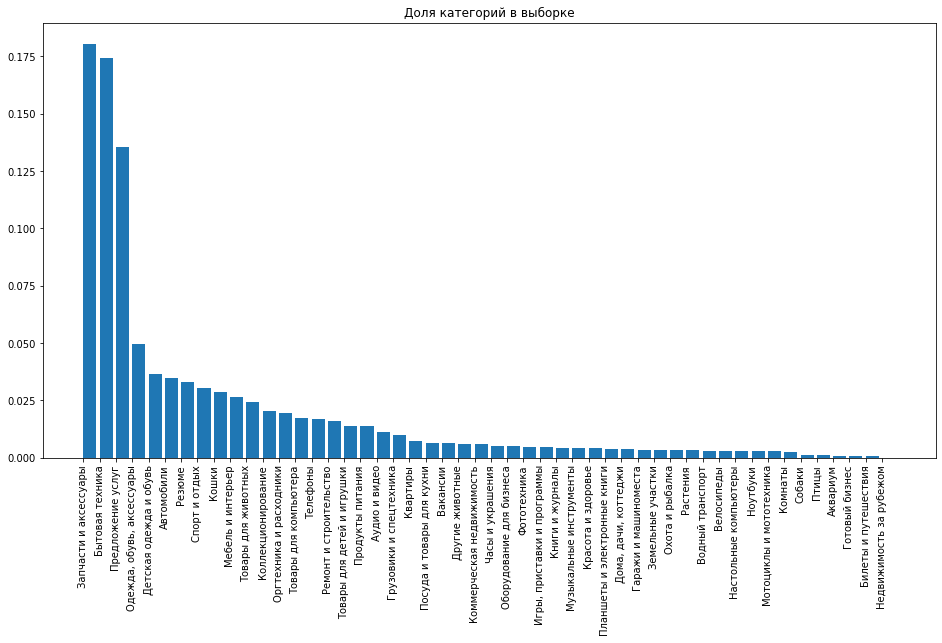

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(train['Category_name'].unique(), doli, align='edge')
ax.set_xticklabels(train['Category_name'].unique(), rotation=90)
plt.title('Доля категорий в выборке')
plt.show()

Наибольшую долю занимает класс "Запчасти и аксессуары", "Бытовая техника" и "Предложение услуг", а наименьшую долю занимает "Недвижимость за границей"

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['merged text'])

In [21]:
X.shape

(100000, 230691)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [10]:
from string import punctuation

In [11]:
dct = cnt_vec.vocabulary_.items()

In [12]:
j, k = 0, 0
lst = ['1', '2', '3', '4', '5',
      '6', '7', '8', '9']
for i in dct:
    if i[0][0] in lst:
        j += 1
    if i[0][0] in punctuation:
        k += 1
print(f'Количество слов начинающихся с цифры: {j}',
      f'Количество слов начинающихся с пунктуационного знака: {k}', sep='\n')

Количество слов начинающихся с цифры: 30708
Количество слов начинающихся с пунктуационного знака: 168


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [14]:
def Customtokenizer(s):
    s = s.lower()
    h = word_tokenize(s)
    deli_lst = stopwords.words('russian') 
    d = []
    stemmer = SnowballStemmer('russian')
    for i in h:
        if (i not in deli_lst) and (re.findall(r'[0-9]+', i) == []) and \
        (re.findall(r'[!"\$%&\'()*+,\-.\—/:;=#@?\\\\^_`«»{|}~]+', i) == []) and \
        (']' not in i) and \
        ('[' not in i): 
            j = stemmer.stem(i)
            d.append(j)
    return d 

In [15]:
traine = train['merged text'][0]
traine = Customtokenizer(traine)
traine

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [16]:
data = train.sample(n=50000)
token = CountVectorizer(tokenizer=Customtokenizer)
result = cnt_vec.fit_transform(data['merged text'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, data['Category'], train_size=0.25, random_state=1233)

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))

0.75384


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=Customtokenizer)
res1 = tfidf_vec.fit_transform(data['merged text'])

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(res1, data['Category'], train_size=0.25, random_state=1233)
model1 = SGDClassifier(random_state=43)
model1.fit(X_train1, y_train1)
pred1 = model1.predict(X_test1)
print(accuracy_score(y_test1,pred1))

0.80352


In [42]:
tfidf_vec2 = TfidfVectorizer(tokenizer=Customtokenizer, max_df=0.9)
res2 = tfidf_vec2.fit_transform(data['merged text'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(res2, data['Category'], train_size=0.25, random_state=12983)
model2 = SGDClassifier(random_state=478)
model2.fit(X_train2, y_train2)
pred2 = model2.predict(X_test2)
print(accuracy_score(y_test2,pred2))

0.7996266666666667


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer
veci = HashingVectorizer(tokenizer=Customtokenizer, n_features=30000)
v = veci.fit_transform(data['merged text'])

/Users/vladashen/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [23]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(v, data['Category'], test_size=0.25, random_state=1244)
model3 = SGDClassifier(random_state=471)
model3.fit(X_train3, y_train3)
pred3 = model3.predict(X_test3)
print(accuracy_score(y_test3, pred3))

0.80832


Лучшее качество на TfidfVectorizer(tokenizer=Customtokenizer, max_df=0.9)